In [1]:
from module import dqn

import random

import gym
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
env = gym.make('CartPole-v1', render_mode='human')
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print("State size = ", state_size, "; action size = ", action_size)

State size =  4 ; action size =  2


TRAINING

In [3]:
env = gym.make('CartPole-v1')
# create an agent
agent = dqn.DQNAgent(state_size, action_size)
# to store the scores and episodes
num_episodes = 10000
scores, avg_scores = [], []
# start training
for e in range(num_episodes):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state[0], [1, state_size])

    while not done:
        # get action for the current state and go one step in environment
        action = agent.act(state)
        next_state, reward, done, _, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action makes the episode end, gives penalty of -100
        if done:
            reward = -100
        # store the data
        agent.store_data(state=state, action=action, reward=reward, next_state=next_state, done=done)
        # train every time step
        agent.learn()
        score += reward
        state = next_state

        if done:
            # score needs to be added by 100 because we punished the last action if done
            score += 100
            scores.append(score)
            avg_scores.append(np.mean(scores[-100:]))
            if e % 50 == 0:
                print("Episode:", e, " -- Score:", score, " -- Avg score:", round(avg_scores[-1], 2))
            # stop training if the avg score is above 1000
        if avg_scores[-1] >= 1000:
            break
            

Episode: 0  -- Score: 39.0  -- Avg score: 39.0


/Users/sondinhvan/miniconda3/envs/rl_env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Collect enough samples. Start training.
Episode: 50  -- Score: 56.0  -- Avg score: 40.9
Episode: 100  -- Score: 681.0  -- Avg score: 168.25
Episode: 150  -- Score: 484.0  -- Avg score: 470.1
Episode: 200  -- Score: 322.0  -- Avg score: 507.18
Episode: 250  -- Score: 531.0  -- Avg score: 346.89
Episode: 300  -- Score: 597.0  -- Avg score: 447.0
Episode: 350  -- Score: 1625.0  -- Avg score: 759.14


KeyboardInterrupt: 

Text(0, 0.5, 'Avg score')

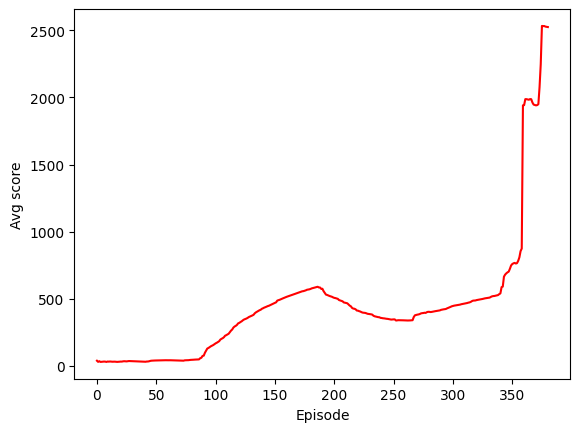

In [4]:
plt.plot(avg_scores, color='red')
plt.xlabel('Episode')
plt.ylabel('Avg score')

TESTING

In [7]:
env = gym.make('CartPole-v1', render_mode='human')
# start testing
done = False
score = 0
state = env.reset()
state = np.reshape(state[0], [1, state_size])

while not done:
    # get action for the current state and go one step in environment
    action = agent.act(state, evaluate=True)
    next_state, reward, done, _, info = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    score += reward
    state = next_state

print(score)

/Users/sondinhvan/miniconda3/envs/rl_env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


KeyboardInterrupt: 

In [6]:
score

1493.0